In [235]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2023-11-27
# @Filename: work.ipynb
# work.

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import math

import pandas as pd

In [236]:
class Cal_sample_statistic:
    """calculate sample statistic 
    
    1. Mean
    2. Geometric mean (can you?!)
    3. Median
    4. Mode
    5. Variance
    6. Standard deviation
    7. Skewness
    8. Kurtosis
    
    """

    def __init__(self, data: list):
        self.data = data
        self.num = len(data)

    def mean(self):
        # mean = sum / num
        sum = 0
        for i in self.data:
            sum = sum + i
        self.num = len(self.data)

        self.mean_val = sum / self.num
        
        return self.mean_val
    
    def geo_mean(self):
        # geo_mean = multip**(1/num)
        multip = 1
        for i in self.data:
            multip = multip*i

        self.geo_mean = multip**(1/self.num)

        return self.geo_mean
    
    def median(self):
        sortlist = sorted(self.data)
        flag = self.num%2
        half = int(self.num/2)
        print(flag)
        if flag == 0:
            fir_term = half - 1
            sec_term = half
            self.median = (sortlist[fir_term] + sortlist[sec_term]) / 2
        else:
            fir_term = (self.num - 1)/2
            print(fir_term)
            self.median = sortlist[fir_term]

        return self.median
    
    def mode(self):
        # mode
        count_dic = {}
        for i in self.data:
            index = 0
            for j in self.data:
                if i==j:
                    index += 1
                else:
                    pass
            
            count_dic[i] = index
        sort_dic = sorted(count_dic.items(), key=lambda x:(-x[1], x[0]))
        mode_tup = sort_dic[0]

        frequency = mode_tup[1]

        if frequency==1:
            self.mode="Not exist"
        else:
            self.mode = mode_tup[0]

        return self.mode


    def variance(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**2
            sum = sum + comp
        
        self.varianceval = sum / self.num
        return self.varianceval

    def StandardDeviation(self):
        # variance**(1/2)
        val=self.variance()
        self.StandardDeviation_val = val**(1/2)
        return self.StandardDeviation_val

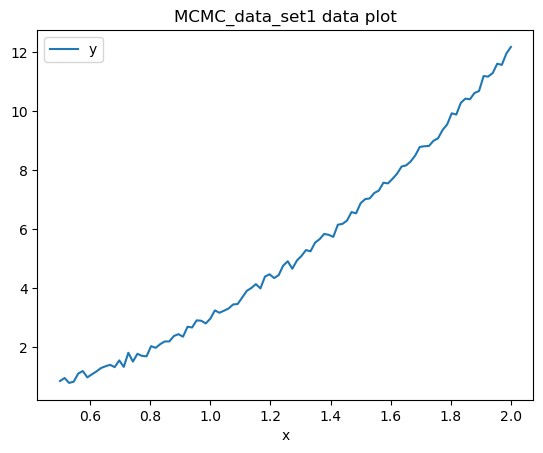

In [237]:
# Data Preparation

MCMC_data_set1 = "./BIC_ex_errorbars.txt"

open_MCMC_data_set1 = open(MCMC_data_set1, "r")

df_MCMC_data_set1 = pd.read_csv(MCMC_data_set1, sep = ' ', names=["x", "y", "error"], header=None)
#df_MCMC_data_set1 = pd.DataFrame(open_MCMC_data_set1)
# x position y value y error

df_MCMC_data_set1.plot(kind='line', x="x", y="y", title="MCMC_data_set1 data plot")
plt.show()



In [238]:
x = df_MCMC_data_set1["x"]
y = df_MCMC_data_set1["y"]
error = df_MCMC_data_set1["error"]

data_x = Cal_sample_statistic(x)
x_sigma = data_x.StandardDeviation()
data_y = Cal_sample_statistic(y)
y_sigma = data_y.StandardDeviation()

len(x)

100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


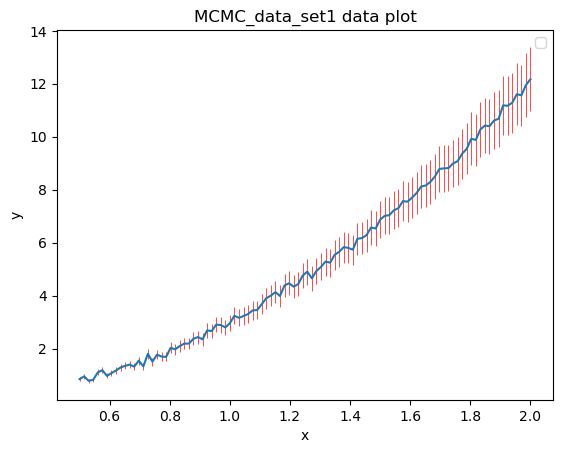

In [239]:
# Plot the true data and the best-fit quadratic model
plt.errorbar(x, y, yerr=error, ecolor="r", elinewidth=0.5)
#plt.scatter(x, y, label="True Data")
#plt.plot(x, quadratic_model(x, best_a, best_b, best_c), color='red', label="Best-fit Quadratic Model")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('MCMC_data_set1 data plot')
plt.show()

In [240]:
import numpy as np
from scipy.stats import norm
import random

# Define the quadratic model
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

chain = []
a_old, b_old, c_old = 2, 0, 0
old_pos = [a_old, b_old, c_old]
chain.append(old_pos)

def chi_squared(y, model, sigma):
    sum = 0
    for i in range(len(y)):
        Chi_squared = (y[i]-model[i])**2/sigma[i]**2
        sum = sum + Chi_squared

    return sum

# Calculate the likelihood
old_likelihood = np.exp(-chi_squared(y, quadratic_model(x, *old_pos), error))
#print(old_likelihood)

# make new positions
record = []
new_position_list = []
new_pos = []
new_likelihood_list = []
chis = []
for i in range(5000):
    a_new, b_new, c_new = a_old + np.random.normal(0, 0.1), b_old+ np.random.normal(0, 0.1), c_old + np.random.normal(0, 0.1)
    # step size
    new_pos = [a_new, b_new, c_new]
    
    # Calculate the likelihood
    chi = chi_squared(y, quadratic_model(x, *new_pos), error)
    new_likelihood = np.exp(-chi)
    #print(new_likelihood)
    
    if new_likelihood > old_likelihood:
        new_position_list.append(new_pos)
        chis.append(chi)
        new_position_list.append(new_pos)
        new_likelihood_list.append(new_likelihood)
        old_pos = new_pos
    elif new_likelihood < old_likelihood:
        rd = random.random()
        if rd < new_likelihood/old_likelihood:
            record.append(new_pos)
            chis.append(chi)
            new_position_list.append(new_pos)
            new_likelihood_list.append(new_likelihood)
            old_pos = new_pos
        else:
            record.append(old_pos)
            chis.append(chi)
            new_position_list.append(old_pos)
            new_likelihood_list.append(old_likelihood)
            old_pos = old_pos


minimum_chi = min(chis)
print(minimum_chi)
index = chis.index(minimum_chi)
print(new_position_list[index])

from numpy import log as ln

def bic(likelihood, k, N):
    return -2*ln(likelihood)+k*ln(N)

bic_md1 = bic(new_likelihood_list[index], 3, 100)


230.7431230395976
[2.0913740498909252, -0.0625862844391447, 0.20930063937845655]


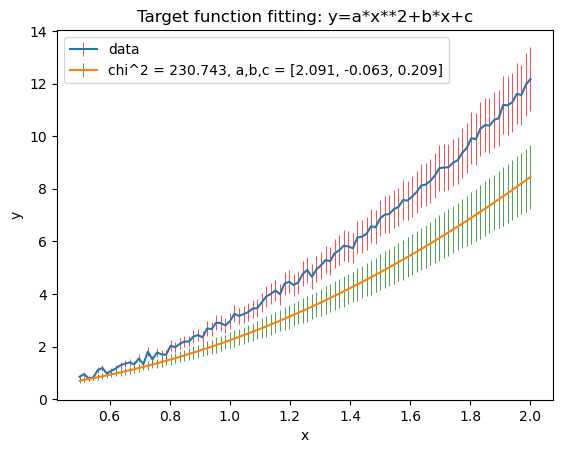

In [241]:
chi_val = round(minimum_chi, 3)
lik_val=[]
for i in range(3):
    lik_val.append(round(new_position_list[index][i], 3))

plt.figure()
plt.errorbar(x, y, yerr=error, ecolor="r", elinewidth=0.5, label="data")
plt.errorbar(x, quadratic_model(x, *new_position_list[index]), yerr=error, label=f"chi^2 = {chi_val}, a,b,c = {lik_val}", ecolor="g", elinewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Target function fitting: y=a*x**2+b*x+c")
plt.show()


In [242]:
import numpy as np
from scipy.stats import norm
import random

# Define the quadratic model
def simple_model(x, a):
    return a * x**2

chain = []
a_old = 2
old_pos = [a_old]
chain.append(old_pos)

def chi_squared(y, model, sigma):
    sum = 0
    for i in range(len(y)):
        Chi_squared = (y[i]-model[i])**2/sigma[i]**2
        sum = sum + Chi_squared

    return sum

# Calculate the likelihood
old_likelihood = np.exp(-chi_squared(y, simple_model(x, *old_pos), error))
#print(old_likelihood)

# make new positions
record = []
new_position_list = []
new_pos = []
new_likelihood_list = []
chis = []
for i in range(5000):
    a_new = a_old + np.random.normal(0, 0.1)
    # step size
    new_pos = [a_new]
    
    # Calculate the likelihood
    chi = chi_squared(y, simple_model(x, *new_pos), error)
    new_likelihood = np.exp(-chi)
    #print(new_likelihood)
    
    if new_likelihood > old_likelihood:
        new_position_list.append(new_pos)
        chis.append(chi)
        new_position_list.append(new_pos)
        new_likelihood_list.append(new_likelihood)
        old_pos = new_pos
    elif new_likelihood < old_likelihood:
        rd = random.random()
        if rd < new_likelihood/old_likelihood:
            record.append(new_pos)
            chis.append(chi)
            new_position_list.append(new_pos)
            new_likelihood_list.append(new_likelihood)
            old_pos = new_pos
        else:
            record.append(old_pos)
            chis.append(chi)
            new_position_list.append(old_pos)
            new_likelihood_list.append(old_likelihood)
            old_pos = old_pos


minimum_chi = min(chis)
index = chis.index(minimum_chi)
print(new_position_list[index])

bic_md2 = bic(new_likelihood_list[index], 1, 100)

[2.317481160794281]


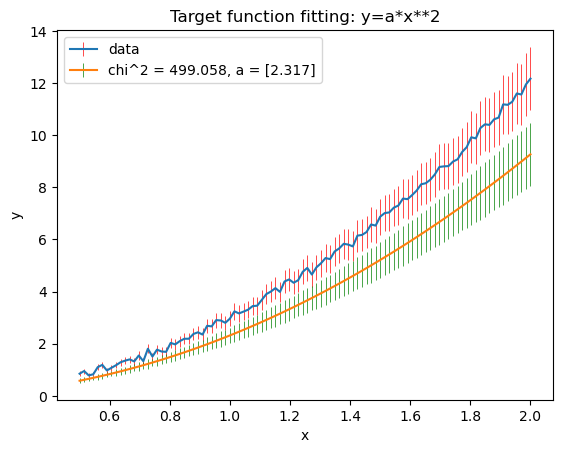

In [243]:
chi_val = round(minimum_chi, 3)
lik_val=[]
for i in range(1):
    lik_val.append(round(new_position_list[index][i], 3))

plt.figure()
plt.errorbar(x, y, yerr=error, ecolor="r", elinewidth=0.5, label="data")
plt.errorbar(x, simple_model(x, *new_position_list[index]), yerr=error, label=f"chi^2 = {chi_val}, a = {lik_val}", ecolor="g", elinewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Target function fitting: y=a*x**2")
plt.show()


In [244]:
print(f"BIC for quadratic model = {bic_md1}")
print(f"BIC for simple model = {bic_md2}")

BIC for quadratic model = 475.3017566371595
BIC for simple model = 1002.721968200209
